#  EDA of Youtube Trending Videos 2025

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"E:\Youtube project\daily_trending_videos.csv")

# Country Level Insights


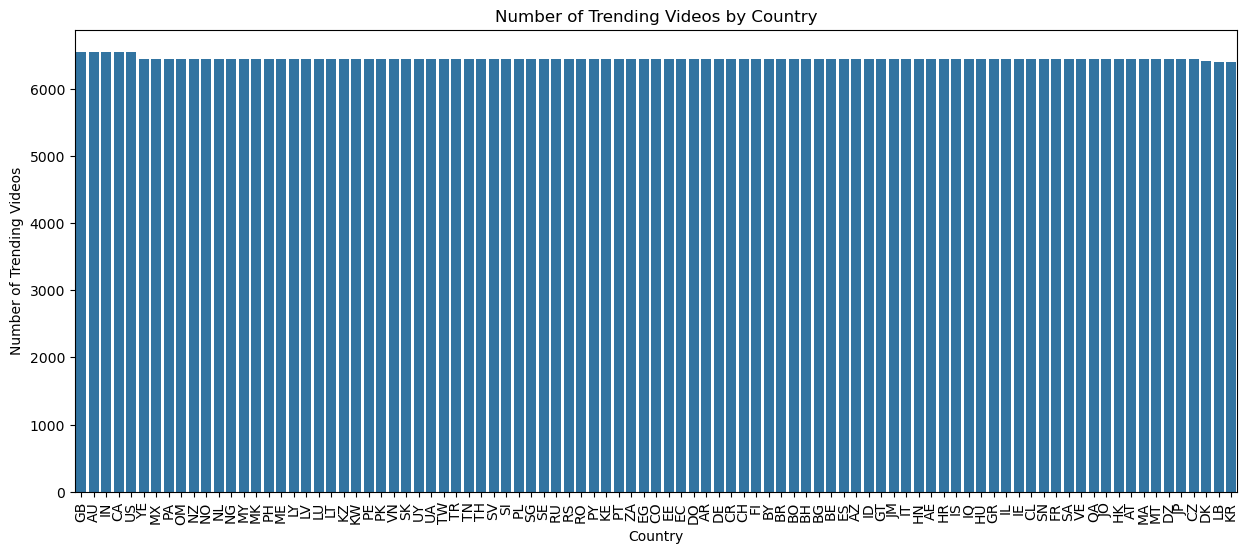

In [33]:
# Number of trending videos per country

country_trend_count = df['country'].value_counts()

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='country', order=country_trend_count.index)
plt.xticks(rotation=90)
plt.title('Number of Trending Videos by Country')
plt.xlabel('Country')
plt.ylabel('Number of Trending Videos')
plt.show()

# Average views per country

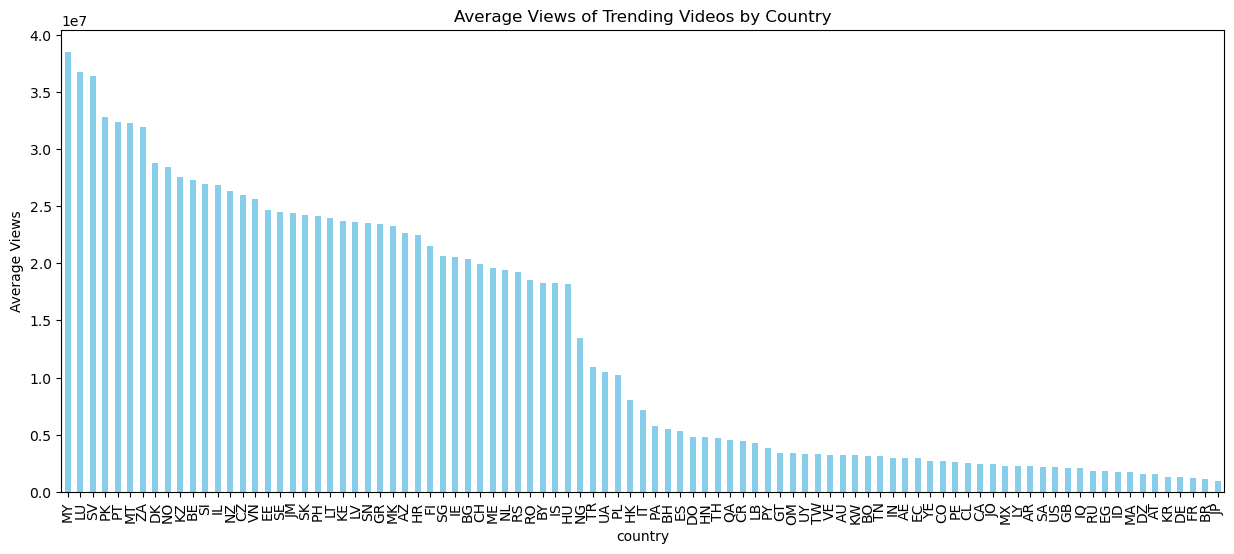

In [37]:


country_avg_views = df.groupby('country')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,6))
country_avg_views.plot(kind='bar', color='skyblue')
plt.title('Average Views of Trending Videos by Country')
plt.ylabel('Average Views')
plt.show()


# Calculating time to trend

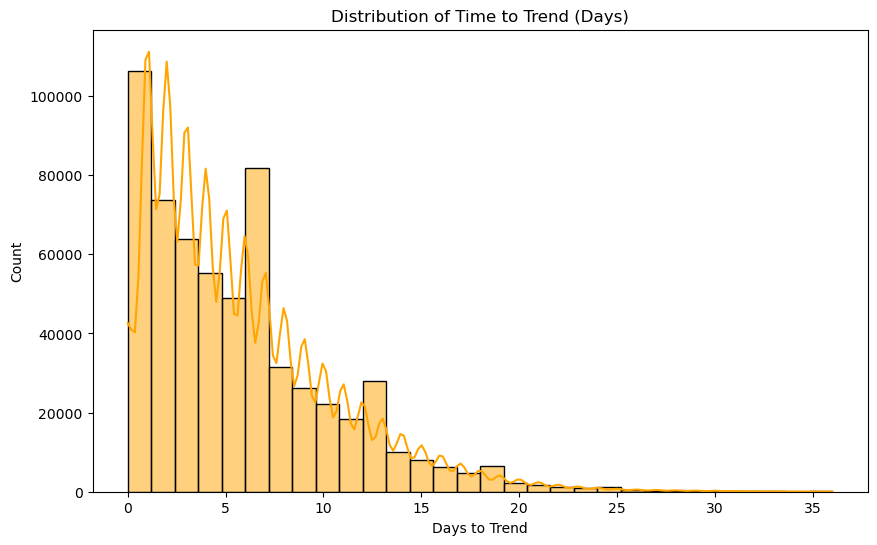

In [50]:
# Converting both columns to datetime and removing timezones (making tz-naive)
df['published_at'] = pd.to_datetime(df['published_at'], utc=True).dt.tz_localize(None)
df['fetch_date'] = pd.to_datetime(df['fetch_date'], utc=True).dt.tz_localize(None)

# Calculating time to trend (lag)
df['trend_delay_days'] = (df['fetch_date'] - df['published_at']).dt.days

# Plot 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['trend_delay_days'], bins=30, kde=True, color='orange')
plt.title('Distribution of Time to Trend (Days)')
plt.xlabel('Days to Trend')
plt.show()


# Correlation Between Views, Likes, and Comments

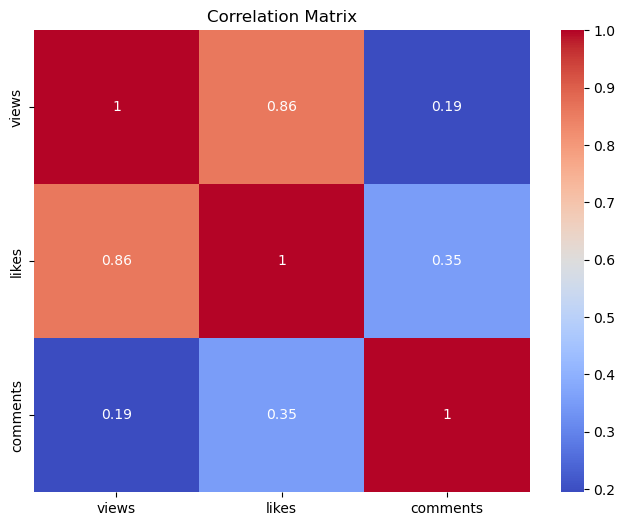

In [52]:


plt.figure(figsize=(8,6))
sns.heatmap(df[['views', 'likes', 'comments']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Videos Trending in Multiple Countries

In [56]:


multi_country_videos = df.groupby('video_id')['country'].nunique().reset_index()
multi_country_videos = multi_country_videos[multi_country_videos['country'] > 1]

print('Videos Trending in Multiple Countries:', multi_country_videos.shape[0])
print(multi_country_videos.head())

Videos Trending in Multiple Countries: 12699
       video_id  country
11  -05OTNbxu0E        2
12  -063LLlBYsY        2
14  -0Fr1blovx8       15
24  -1CEjSdD6MA        2
33  -1cYgXOXPUU        5


In [ ]:
# VIDEO14 IS TRENDING IN 15 COUNTRIES AND 33 IS TRENDING IN 5 COUNTRIES.

# Visualization of Distribution of Multi-country Trending Videos

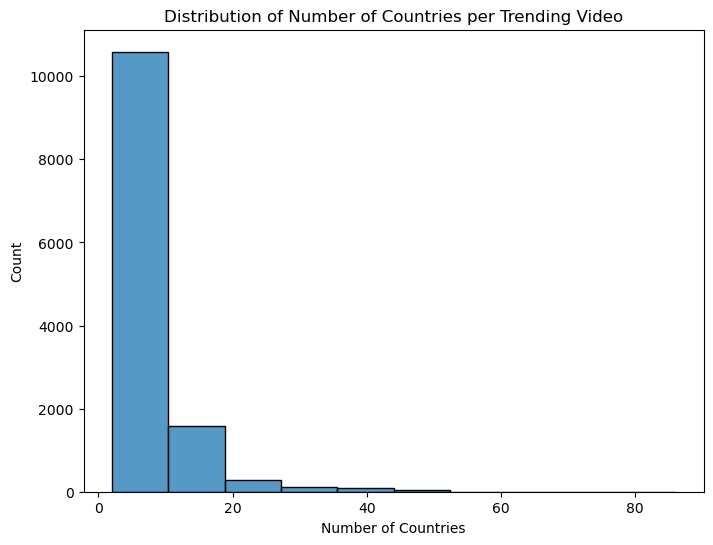

In [58]:



plt.figure(figsize=(8,6))
sns.histplot(multi_country_videos['country'], bins=10)
plt.title('Distribution of Number of Countries per Trending Video')
plt.xlabel('Number of Countries')
plt.show()

# when do videos trend

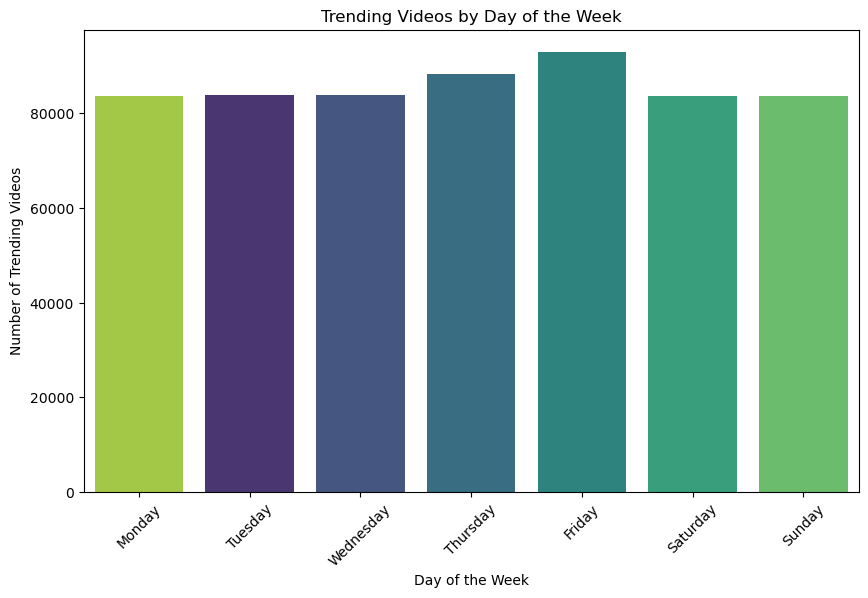

In [78]:


df['fetch_date'] = pd.to_datetime(df['fetch_date'])
df['day_of_week'] = df['fetch_date'].dt.day_name()

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_week', hue='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis', legend=False)
plt.title('Trending Videos by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# VIDEOS TRENDS ON FRIDAY THEN TTHURSDAY.

# Distribution of views, likes and comments

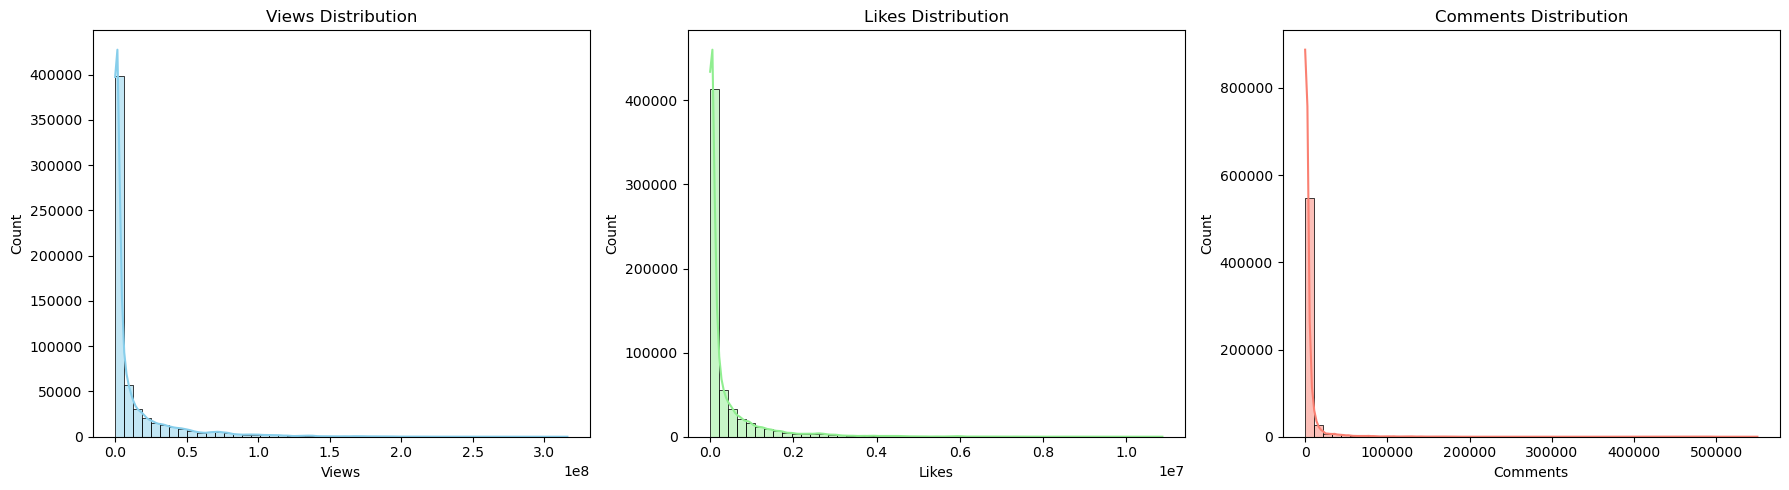

In [84]:


plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.histplot(df['views'], bins=50, kde=True, color='skyblue')
plt.title('Views Distribution')
plt.xlabel('Views')

plt.subplot(1, 3, 2)
sns.histplot(df['likes'], bins=50, kde=True, color='lightgreen')
plt.title('Likes Distribution')
plt.xlabel('Likes')

plt.subplot(1, 3, 3)
sns.histplot(df['comments'], bins=50, kde=True, color='salmon')
plt.title('Comments Distribution')
plt.xlabel('Comments')

plt.tight_layout()
plt.show()



# Top Trending Channels

C:\Users\HP\AppData\Local\Temp\ipykernel_1592\3956098656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels, x='count', y='channel', palette='crest')  # Removed hue to avoid warning
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12387 (\N{HIRAGANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12379 (\N{HIRAGANA LETTER SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


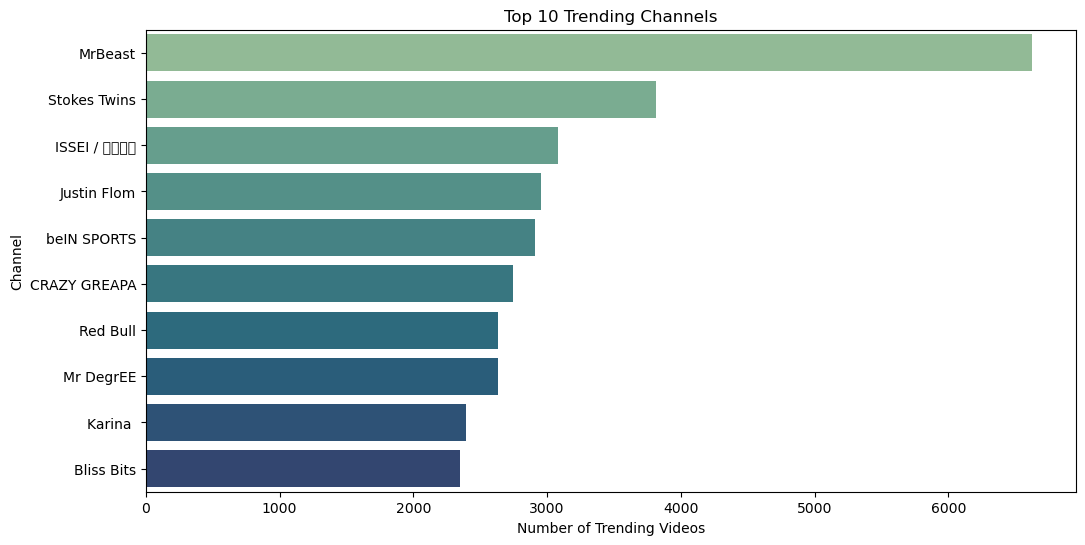

In [107]:


top_channels = df['channel'].value_counts().head(10).reset_index()
top_channels.columns = ['channel', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=top_channels, x='count', y='channel', palette='crest')  # Removed hue to avoid warning
plt.title('Top 10 Trending Channels')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel')
plt.show()

In [ ]:
# MRBEAST IS TOP TRENDING CHANNEL.

# Views by Day of the Week

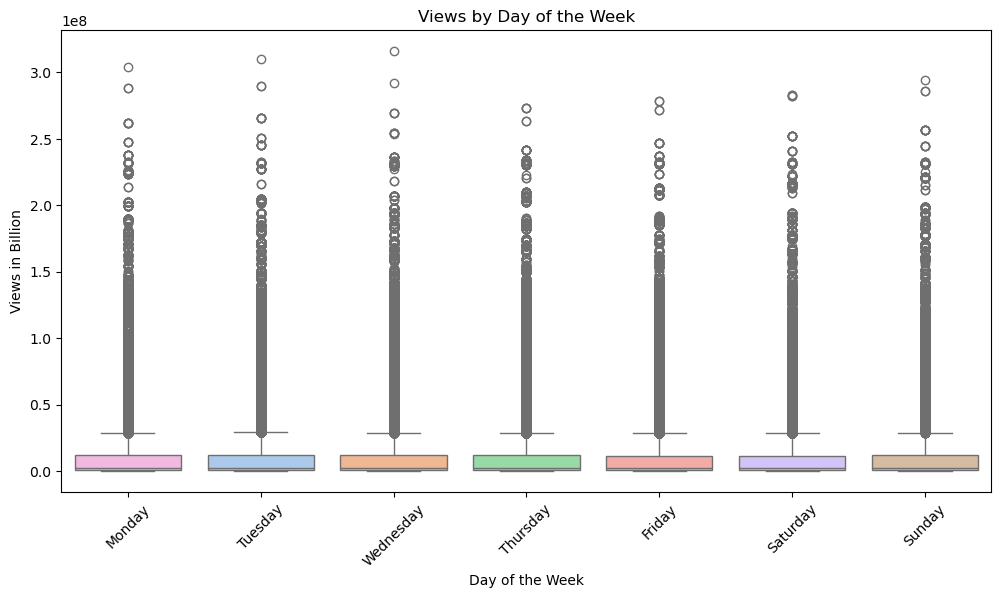

In [144]:


plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='day_of_week',
    y='views',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    hue='day_of_week',  # Assign hue to the same variable as x to fix the warning
    palette='pastel',
    legend=False  # Suppress the legend since it's redundant
)
plt.title('Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Views in Billion')
plt.xticks(rotation=45)
plt.show()

# Does trending quickly result in more views? - Trend Delay vs Views

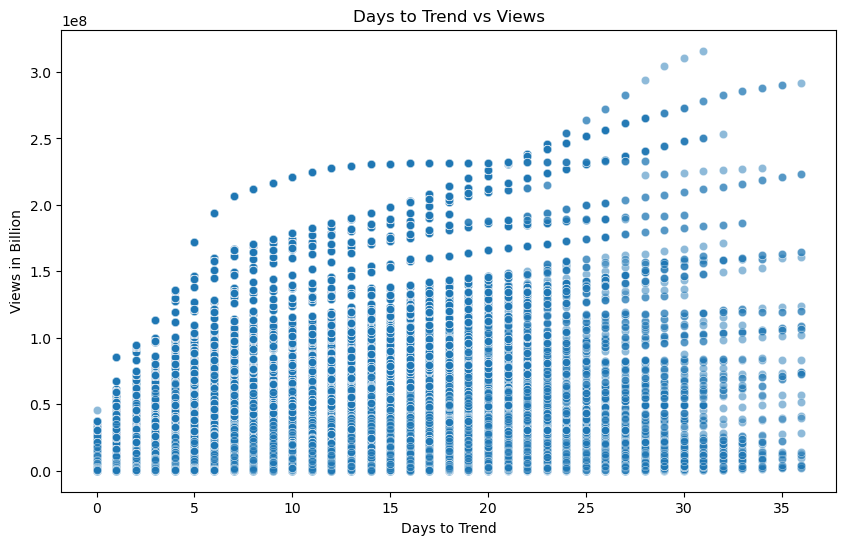

In [142]:


plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='trend_delay_days', y='views', alpha=0.5)
plt.title('Days to Trend vs Views')
plt.xlabel('Days to Trend')
plt.ylabel('Views in Billion')
plt.show()

In [ ]:
# SO IT TAKES 35+ DAYS TO HAVE ~3 BILLION VIEWS.

# Engagement Rate 

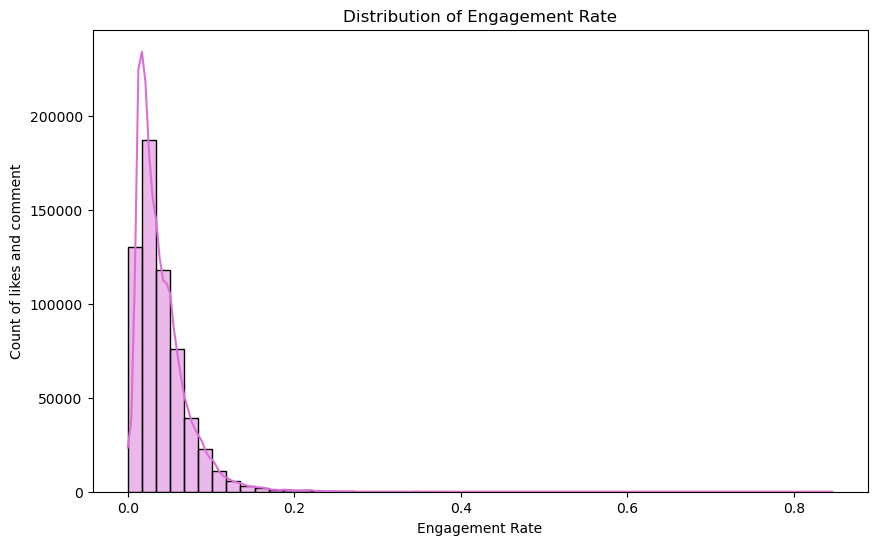

In [138]:


df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

plt.figure(figsize=(10,6))
sns.histplot(df['engagement_rate'], bins=50, kde=True, color='orchid')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Count of likes and comment')
plt.show()

# Outlier Detection Using Boxplots

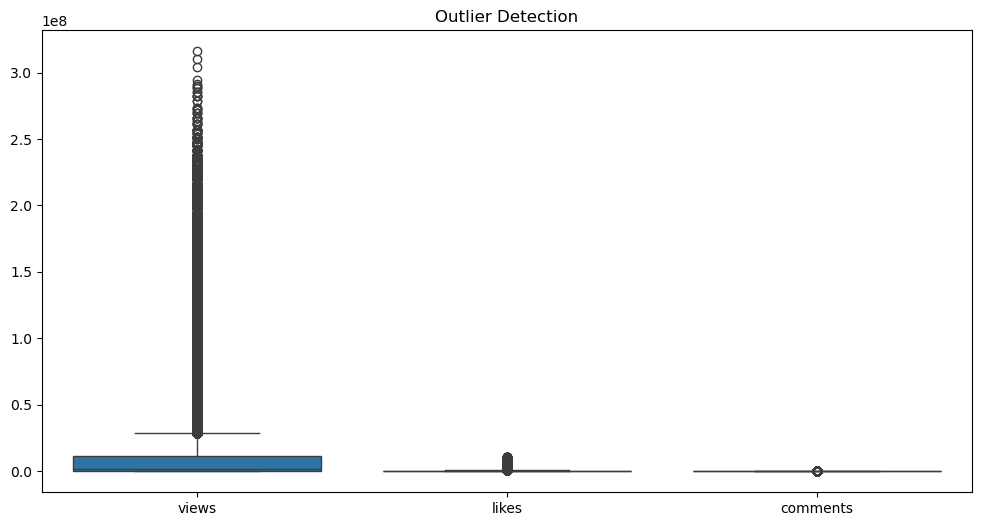

In [115]:


plt.figure(figsize=(12,6))
sns.boxplot(data=df[['views', 'likes', 'comments']])
plt.title('Outlier Detection')
plt.show()

# Summary by Country

In [123]:


summary = df.groupby('country').agg({
    'views':'mean', 
    'likes':'mean', 
    'comments':'mean', 
    'trend_delay_days':'mean'
}).sort_values(by='views', ascending=False).head(10)

print(summary.head())

                views         likes      comments  trend_delay_days
country                                                            
MY       3.850141e+07  9.751437e+05   3975.192093          9.581705
LU       3.672952e+07  1.122013e+06  11401.868527          9.695349
SV       3.635084e+07  9.903376e+05   4746.805116         10.832248
PK       3.280458e+07  7.346592e+05   2113.991628          8.801395
PT       3.233210e+07  9.194457e+05   5832.580930         10.312713


In [ ]:
# THESE ARE FIVE BEST PERFORMING COUNTRIES.

# Weekly Trend Analysis: Peak trending days

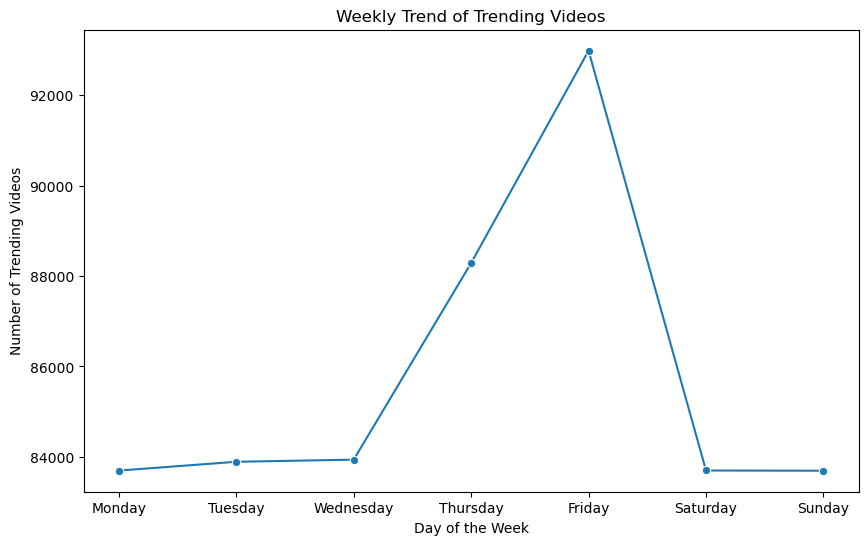

In [119]:


weekly_trend = df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,6))
sns.lineplot(x=weekly_trend.index, y=weekly_trend.values, marker='o')
plt.title('Weekly Trend of Trending Videos')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.show()

In [ ]:
# VIDEO TRENDS ON FRIDAY.